In [3]:
import cv2

In [40]:
image = cv2.imread('./ml_data/test.jpg')

In [3]:
import matplotlib.pyplot as plt

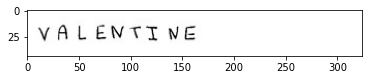

In [41]:
plt.imshow(image)

In [42]:
grayscaleImg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

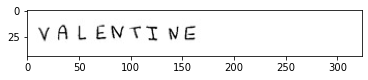

In [45]:
plt.imshow(grayscaleImg, cmap='gray')

In [46]:
retval, thresholdImg = cv2.threshold(grayscaleImg, 127, 255, cv2.THRESH_BINARY_INV)

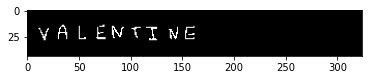

In [47]:
plt.imshow(thresholdImg, cmap='gray')

In [59]:
dilateImg = cv2.dilate(thresholdImg, None, iterations=2)

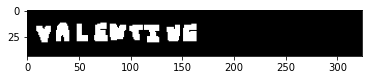

In [60]:
plt.imshow(dilateImg, cmap='gray')

In [61]:
cnts = cv2.findContours(dilateImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [67]:
cnts = imutils.grab_contours(cnts)

# 글자 조합을 위해 정렬이 필요함

In [76]:
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    print('x={}, y={}, w={}, h={}'.format(x, y, w, h))

x=9, y=15, w=14, h=16
x=135, y=14, w=13, h=16
x=113, y=14, w=15, h=17
x=99, y=14, w=13, h=15
x=151, y=13, w=13, h=17
x=80, y=13, w=16, h=16
x=48, y=13, w=11, h=17
x=65, y=12, w=13, h=18
x=28, y=12, w=13, h=18


In [92]:
rects = []
for c in cnts:
    rects.append(cv2.boundingRect(c));

In [93]:
for rect in rects:
    print(rect)

(9, 15, 14, 16)
(135, 14, 13, 16)
(113, 14, 15, 17)
(99, 14, 13, 15)
(151, 13, 13, 17)
(80, 13, 16, 16)
(48, 13, 11, 17)
(65, 12, 13, 18)
(28, 12, 13, 18)


In [79]:
rects.sort(key=lambda x:x[1]) # 먼저 높이로 정렬

In [80]:
for rect in rects:
    print(rect)

(65, 12, 13, 18)
(28, 12, 13, 18)
(151, 13, 13, 17)
(80, 13, 16, 16)
(48, 13, 11, 17)
(135, 14, 13, 16)
(113, 14, 15, 17)
(99, 14, 13, 15)
(9, 15, 14, 16)


In [81]:
rects.sort(key=lambda x:x[0]) # 그다음 가로로 정렬.

In [82]:
for rect in rects:
    print(rect)

(9, 15, 14, 16)
(28, 12, 13, 18)
(48, 13, 11, 17)
(65, 12, 13, 18)
(80, 13, 16, 16)
(99, 14, 13, 15)
(113, 14, 15, 17)
(135, 14, 13, 16)
(151, 13, 13, 17)


In [90]:
rects.sort(key=lambda x:(x[0], [1]))

In [91]:
for rect in rects:
    print(rect)

(9, 15, 14, 16)
(28, 12, 13, 18)
(48, 13, 11, 17)
(65, 12, 13, 18)
(80, 13, 16, 16)
(99, 14, 13, 15)
(113, 14, 15, 17)
(135, 14, 13, 16)
(151, 13, 13, 17)


# FindContour

pip install imutils

In [3]:
import cv2
import imutils
import numpy as np

def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

def predictLetters(imagePath):
    contourImgs = []
    
    img = cv2.imread(imagePath)
    grayscaleImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    retval, thresholdImg = cv2.threshold(grayscaleImg, 127, 255, cv2.THRESH_BINARY_INV)
    dilateImg = cv2.dilate(thresholdImg, None, iterations=2)
    
    cnts = cv2.findContours(dilateImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    
    for c in cnts:
        if 10 < cv2.contourArea(c):
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
            contourImg = grayscaleImg[y:y+h, x:x+w]
            
            retval, thresholdImg = cv2.threshold(contourImg, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
            thresholdImg = cv2.resize(thresholdImg, (28,28), interpolation = cv2.INTER_CUBIC)
    
            #thresholdImg = np.expand_dims(thresholdImg, axis=-1)
            thresholdImg = np.repeat(thresholdImg[..., np.newaxis], 3, -1)
            
            contourImgs.append(thresholdImg);
            
    return img, contourImgs

In [4]:
img, contourImgs = predictLetters('./ml_data/test.jpg')

In [5]:
import matplotlib.pyplot as plt

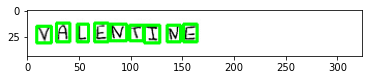

In [6]:
plt.imshow(img)

# 모델로 예측

In [8]:
import tensorflow as tf

In [9]:
model = tf.keras.models.load_model('ml_model/alphabet_and_number_size_28.h5')

In [ ]:
import numpy as np

In [10]:
#trainFeatures = np.load('D:/root/_temp/trainFeatures.npy')
#trainLabels = np.load('D:/root/_temp/trainLabels.npy')
testFeatures = np.load('D:/root/_temp/testFeatures.npy')
testLabels = np.load('D:/root/_temp/testLabels.npy')

In [13]:
predictions = np.argmax(model.predict(testFeatures), axis=-1)
predictions

array([ 4, 13,  2, ..., 30, 31, 32], dtype=int64)

In [11]:
import jipsa

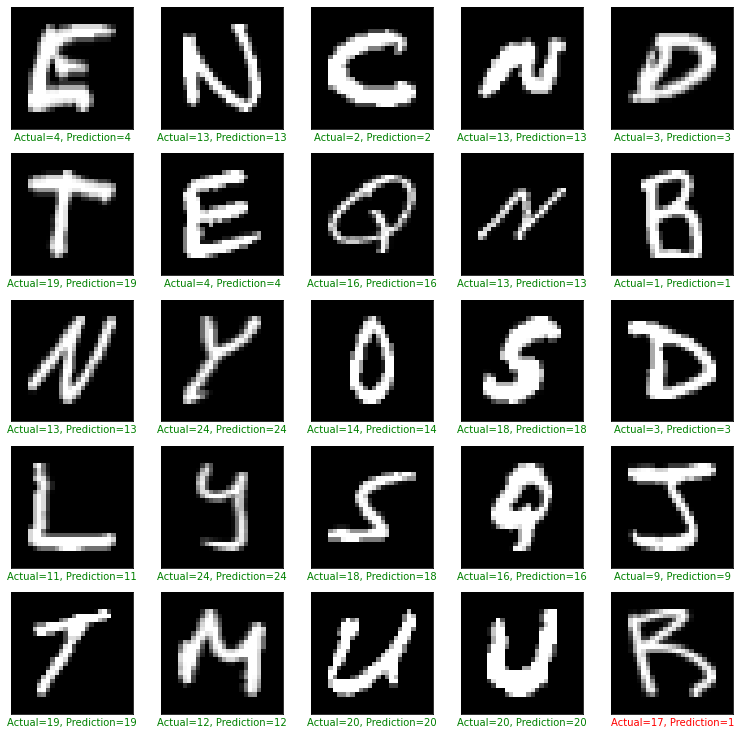

In [14]:
jipsa.printPrediction(testFeatures, testLabels, predictions)

In [15]:
letters = np.array([
    'a','b','c','d','e','f','g','h','i','j','k','l','m'
    ,'n','o','p','q','r','s','t','u','v','w','x','y','z'
    ,0,1,2,3,4,5,6,7,8,9
])

In [16]:
npContourImgs = np.array(contourImgs)
npContourImgs.shape

(9, 28, 28, 3)

In [17]:
predictions = np.argmax(model.predict(npContourImgs), axis=-1)
predictions

array([13,  0, 11,  4, 13, 19,  9, 13,  4], dtype=int64)

In [18]:
result = []
for prediction in predictions:
    result.append(letters[prediction])
result

['n', 'a', 'l', 'e', 'n', 't', 'j', 'n', 'e']

In [75]:
import matplotlib.pyplot as plt

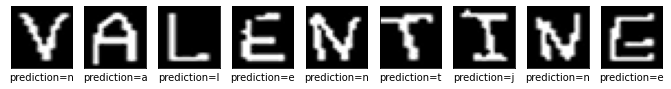

In [19]:
plt.figure(figsize=(13, 13))

length = len(contourImgs)
for i in range(length):
    plt.subplot(2, 10, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    reshapeImg = contourImgs[i].reshape(1, 28, 28, 3)
    prediction = np.argmax(model.predict(reshapeImg), axis=-1)[0]
    plt.xlabel('prediction={}'.format(letters[prediction]))
    
    plt.imshow(contourImgs[i])